In [1]:
import sys
sys.path.insert(0, "../..")

In [22]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from logistic_regression import LogisticRegressionGD
from extrapolation import *
from experiments import Experiment

In [3]:
device = "cpu"

X = []
with open("../../../madelon_train.data") as f:
    for line in f:
        X.append([float(x) for x in line.split()])
X = np.array(X)
X /= X.max()
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
X = torch.tensor(X, device=device)
with open("../../../madelon_train.labels") as f:
    y = [int(x) for x in f]
y = torch.tensor(y, device=device)
X.shape, y.shape

(torch.Size([2000, 501]), torch.Size([2000]))

In [4]:
np.random.seed(2020)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

$\tau = 10^2$

In [5]:
model = LogisticRegressionGD(X_train, y_train, 1e2, device=device)

In [6]:
model.fit(1e-8, max_iter=100500)

In [7]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5600, dtype=torch.float64)

In [8]:
len(model.log)

2621

In [10]:
experiment = Experiment(model.log, model.obj, values=model.value_log, device=device)
k = 6

In [11]:
experiment.run_method("RRE+QR", RRE, k, method_kwargs={"qr": True})

In [12]:
experiment.run_method("MMPE", MMPE, k)

In [14]:
experiment.run_method("TEA", TEA_solve, 2*k, input_size=k)

In [15]:
experiment.run_method("RRE+QR", RRE, k, method_kwargs={"qr": True})

In [16]:
experiment.run_method("RNA+norm", RNA, k, method_kwargs={"lambda_range": (1e-15, 1e-2), "linesearch": False})

In [17]:
experiment.run_method("RNA+ls", RNA, k, method_kwargs={"lambda_range": (1e-15, 1e-2), "linesearch": True})

In [18]:
experiment.run_method("Epsilon inv", vector_epsilon_v1, 2*k, method_kwargs={"k": k})

In [19]:
experiment.run_method("Epsilon mult", vector_epsilon_v2, 2*k, method_kwargs={"k": k})

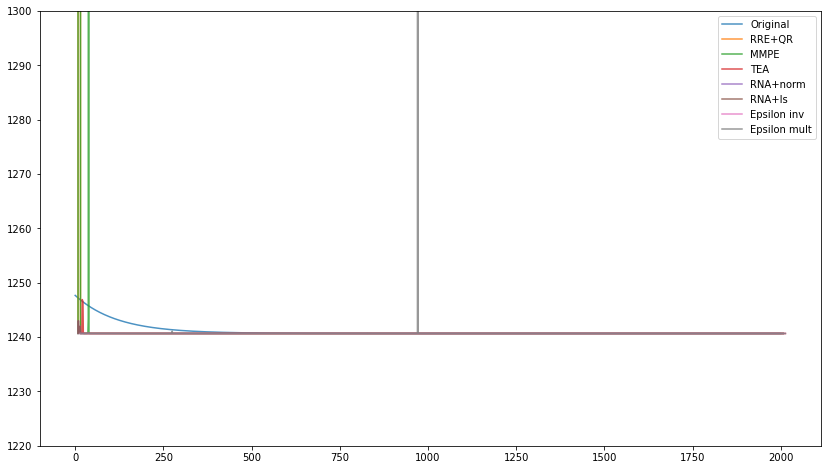

In [24]:
plt.figure(figsize=(14, 8))
experiment.plot_values(n=2000)
plt.ylim(1220, 1300)
plt.legend()

../../experiments.py:72: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x)]) - best)),
../../experiments.py:72: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x)]) - best)),
../../experiments.py:72: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x)]) - best)),


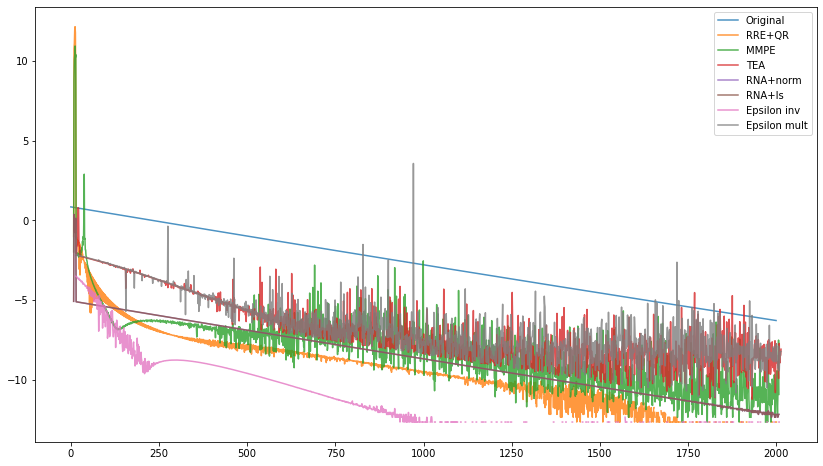

In [25]:
plt.figure(figsize=(14, 8))
experiment.plot_log_diff(n=2000)
plt.legend()

In [26]:
model.theta = experiment.best_x
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5600, dtype=torch.float64)

In [27]:
df = experiment.value_df()
df.to_csv(f"results/madelon-new-methods:tau=1e2.csv")

$\tau = 10^{-3}$

In [30]:
model = LogisticRegressionGD(X_train, y_train, 1e-3, device=device)

In [31]:
model.fit(1e-8, max_iter=100500)

In [32]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5600, dtype=torch.float64)

In [33]:
len(model.log)

100501

In [34]:
experiment = Experiment(model.log, model.obj, values=model.value_log, device=device)
k = 6

In [35]:
experiment.run_method("RRE+QR", RRE, k, method_kwargs={"qr": True})

In [36]:
experiment.run_method("MMPE", MMPE, k)

In [37]:
experiment.run_method("TEA", TEA_solve, 2*k, input_size=k)

In [38]:
experiment.run_method("RRE+QR", RRE, k, method_kwargs={"qr": True})

In [39]:
experiment.run_method("RNA+norm", RNA, k, method_kwargs={"lambda_range": (1e-15, 1e-2), "linesearch": False})

In [40]:
experiment.run_method("RNA+ls", RNA, k, method_kwargs={"lambda_range": (1e-15, 1e-2), "linesearch": True})

In [41]:
experiment.run_method("Epsilon inv", vector_epsilon_v1, 2*k, method_kwargs={"k": k})

In [42]:
experiment.run_method("Epsilon mult", vector_epsilon_v2, 2*k, method_kwargs={"k": k})

In [55]:
experiment.run_method("Regularized RRE", regularized_RRE, k, method_kwargs={"lambda_": 1e-15})

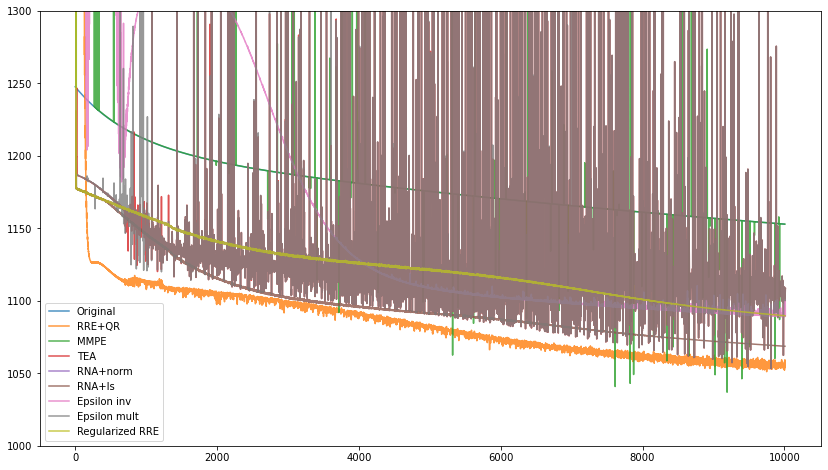

In [56]:
plt.figure(figsize=(14, 8))
experiment.plot_values(n=10000)
plt.ylim(1000, 1300)
plt.legend()

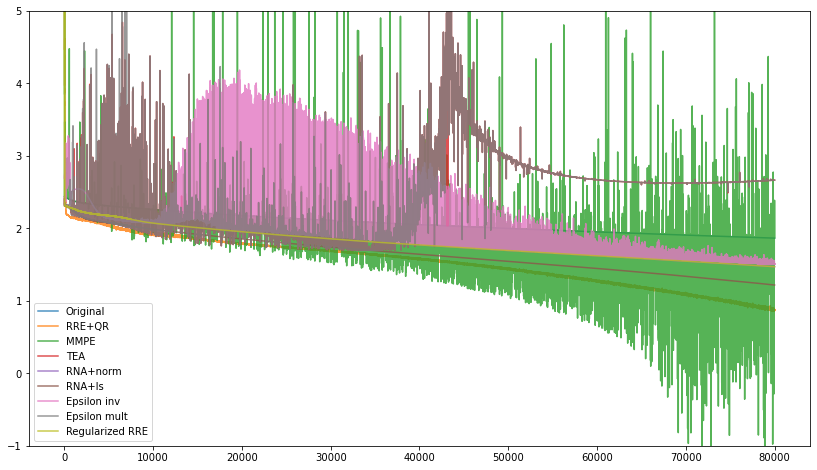

In [57]:
plt.figure(figsize=(14, 8))
experiment.plot_log_diff(n=80000)
plt.ylim(-1, 5)
plt.legend()

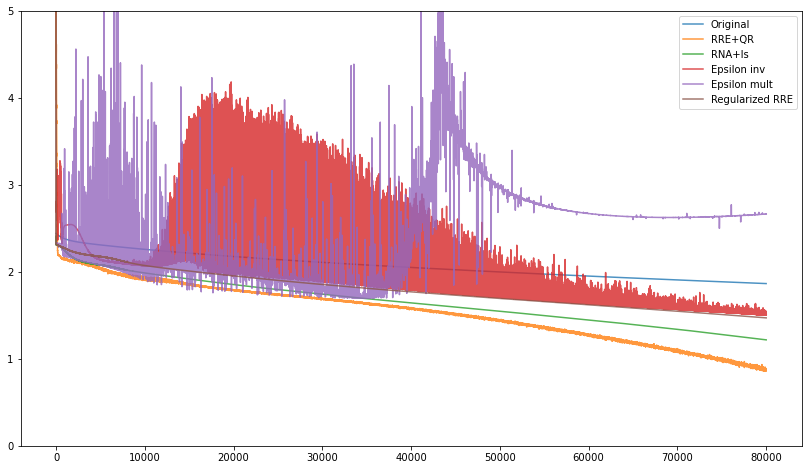

In [66]:
plt.figure(figsize=(14, 8))
experiment.plot_log_diff(n=80000, methods=["RRE+QR", "RNA+ls", "Epsilon inv", "Epsilon mult", "Regularized RRE"])
plt.ylim(-0, 5)
plt.legend()

In [67]:
model.theta = experiment.best_x
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5450, dtype=torch.float64)

In [68]:
df = experiment.value_df()
df.to_csv(f"results/madelon-new-methods:tau=1e-7.csv")